In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split

data = pd.read_csv("mnist_784_csv.csv")
data = data.drop(columns=['class']).values

data = data / 255.0

train, test = train_test_split(data, test_size=.2)


In [5]:
model = Sequential([
    Dense(256, activation='relu'),
    Dense(64, activation='relu', activity_regularizer=regularizers.l1(1e-5)),
    Dense(256, activation='relu'),
    Dense(784, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='mse'
)
result = model.fit(train, train, validation_split=.1, epochs=20)

Epoch 1/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0525 - val_loss: 0.0222
Epoch 2/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0210 - val_loss: 0.0182
Epoch 3/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0176 - val_loss: 0.0161
Epoch 4/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0157 - val_loss: 0.0148
Epoch 5/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0145 - val_loss: 0.0139
Epoch 6/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0137 - val_loss: 0.0132
Epoch 7/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0131 - val_loss: 0.0130
Epoch 8/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 9/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0123 - val_loss: 0.0123
Epoch 10/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0120 - val_loss: 0.0119
Epoch 11/20
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0118 - val_loss: 0.0116
Epoch 12/20
1575/1575 ━━━━━━━━

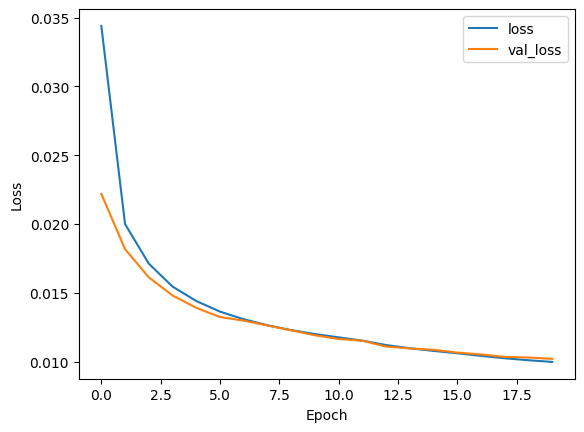

In [7]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label="val_loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step


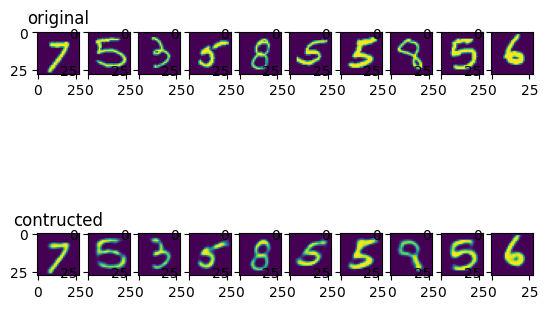

In [10]:
pred = model.predict(test)
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(test[i].reshape(28, 28))
    if i==0: plt.title("original")

    plt.subplot(2, 10, i+10+1)
    plt.imshow(pred[i].reshape(28, 28))
    if i==0: plt.title("contructed")
    